In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as skt

In [96]:
path = '/content/drive/My Drive/bases_capesppg_docentes/capesppg_docentes_2013-2019.csv'
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- Visualizando os dados do dataset:

In [97]:
df.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017
0,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,832956,FEMININO,1975,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,PARIS 7,UNIVERSITÉ PARIS DIDEROT - PARIS VII,FRANÇA,AVALIAÇÃO
1,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,34738,MASCULINO,1978,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,AVALIAÇÃO
2,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,729344,MASCULINO,1954,55 A 59 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,BRASIL,AVALIAÇÃO
3,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,526496,FEMININO,1966,45 A 49 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,NaN,S,1999.0,DOUTORADO,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,AVALIAÇÃO
4,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,10229,MASCULINO,1928,70 OU MAIS,BRASIL,APOSENTADO,PARCIAL,NaN,S,1960.0,DOUTORADO,USP,UNIVERSIDADE DE SÃO PAULO,BRASIL,AVALIAÇÃO


- Demonstrando de forma visual que há dados dos anos 2013 à 2019 neste dataset:

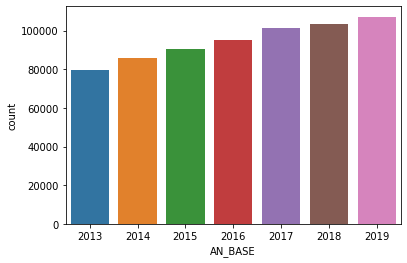

In [98]:
sns.countplot(x='AN_BASE', data = df)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662665 entries, 0 to 662664
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AN_BASE                        662665 non-null  int64  
 1   CD_AREA_AVALIACAO              662665 non-null  int64  
 2   NM_AREA_AVALIACAO              662665 non-null  object 
 3   NM_GRANDE_AREA_CONHECIMENTO    662665 non-null  object 
 4   NM_AREA_CONHECIMENTO           662665 non-null  object 
 5   CD_PROGRAMA_IES                662665 non-null  object 
 6   NM_PROGRAMA_IES                662665 non-null  object 
 7   NM_GRAU_PROGRAMA               662665 non-null  object 
 8   NM_MODALIDADE_PROGRAMA         662665 non-null  object 
 9   CD_CONCEITO_PROGRAMA           662665 non-null  object 
 10  SG_ENTIDADE_ENSINO             662665 non-null  object 
 11  NM_ENTIDADE_ENSINO             662665 non-null  object 
 12  CS_STATUS_JURIDICO            

- As análises envolvendo os conceitos dos programas apresentou erro em diversas situações. Notei que o erro é devido a alguns conceitos estarem no formato string:

In [100]:
df['CD_CONCEITO_PROGRAMA'].unique()

array([3, 4, 2, 5, 6, 7, 1, '5', '4', '3', '2', '6', '7', '1', 'A'],
      dtype=object)

- Abaixo notamos que o conceito 'A' é um problema das bases dos anos 2018 e 2019.

In [101]:
df.loc[df.CD_CONCEITO_PROGRAMA == 'A'].AN_BASE.unique()

array([2018, 2019])

- Para eliminar os conceitos 'A' criei um dataset filtrando todos os conceitos diferentes de 'A'

In [102]:
df1 = df[df['CD_CONCEITO_PROGRAMA'] != 'A']
df1['CD_CONCEITO_PROGRAMA'].unique()

array([3, 4, 2, 5, 6, 7, 1, '5', '4', '3', '2', '6', '7', '1'],
      dtype=object)

- Com os conceitos 'A' eliminados, o próximo passo foi transformar todos os dados de conceito em variável inteira

In [103]:
df1['CD_CONCEITO_PROGRAMA'].unique()

array([3, 4, 2, 5, 6, 7, 1, '5', '4', '3', '2', '6', '7', '1'],
      dtype=object)

In [104]:
df1.CD_CONCEITO_PROGRAMA = df1.CD_CONCEITO_PROGRAMA.astype('int64')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658805 entries, 0 to 662664
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AN_BASE                        658805 non-null  int64  
 1   CD_AREA_AVALIACAO              658805 non-null  int64  
 2   NM_AREA_AVALIACAO              658805 non-null  object 
 3   NM_GRANDE_AREA_CONHECIMENTO    658805 non-null  object 
 4   NM_AREA_CONHECIMENTO           658805 non-null  object 
 5   CD_PROGRAMA_IES                658805 non-null  object 
 6   NM_PROGRAMA_IES                658805 non-null  object 
 7   NM_GRAU_PROGRAMA               658805 non-null  object 
 8   NM_MODALIDADE_PROGRAMA         658805 non-null  object 
 9   CD_CONCEITO_PROGRAMA           658805 non-null  int64  
 10  SG_ENTIDADE_ENSINO             658805 non-null  object 
 11  NM_ENTIDADE_ENSINO             658805 non-null  object 
 12  CS_STATUS_JURIDICO            

In [106]:
df1['CD_CONCEITO_PROGRAMA'].unique()

array([3, 4, 2, 5, 6, 7, 1])

In [107]:
df1.groupby('AN_BASE').mean()['CD_CONCEITO_PROGRAMA'].sort_values(ascending=True)

AN_BASE
2016    4.235096
2015    4.281794
2018    4.311165
2014    4.320163
2019    4.321311
2017    4.326215
2013    4.371254
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [108]:
df1.groupby('NM_PAIS_IES_TITULACAO').mean()['CD_CONCEITO_PROGRAMA'].round(2).sort_values(ascending=False).head(15)

NM_PAIS_IES_TITULACAO
GEÓRGIA             7.00
ESLOVÊNIA           7.00
CROÁCIA             6.00
SINGAPURA           6.00
TURQUIA             6.00
PORTO RICO          5.92
REPÚBLICA TCHECA    5.36
ISRAEL              5.33
CAMARÕES            5.33
BULGÁRIA            5.33
HUNGRIA             5.11
DINAMARCA           5.08
COREIA DO SUL       5.08
TAIWAN              5.00
HONG KONG           5.00
Name: CD_CONCEITO_PROGRAMA, dtype: float64

- Tratando as colunas a fim de gerar features

In [109]:
df1['Mulheres'] = np.where(df1['TP_SEXO_DOCENTE'] == 'FEMININO', 1,0)
print(df1)

        AN_BASE  CD_AREA_AVALIACAO  ... DS_CLIENTELA_QUADRIENAL_2017 Mulheres
0          2013                  9  ...                    AVALIAÇÃO        1
1          2013                  9  ...                    AVALIAÇÃO        0
2          2013                  9  ...                    AVALIAÇÃO        0
3          2013                  9  ...                    AVALIAÇÃO        1
4          2013                  9  ...                    AVALIAÇÃO        0
...         ...                ...  ...                          ...      ...
662660     2019                 26  ...                          NaN        1
662661     2019                 26  ...                          NaN        0
662662     2019                 26  ...                          NaN        0
662663     2019                 26  ...                          NaN        1
662664     2019                 26  ...                          NaN        0

[658805 rows x 31 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
df1['Homens'] = np.where(df1['TP_SEXO_DOCENTE'] == 'MASCULINO', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
df1['QTD_DOCENTES'] = df1.agg({'ID_PESSOA': np.size})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
df1['Brasileiros'] = np.where(df1['NM_PAIS_NACIONALIDADE_DOCENTE'] == 'BRASIL', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
df1['Estrangeiros'] = np.where(df1['NM_PAIS_NACIONALIDADE_DOCENTE'] != 'BRASIL', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
df1['DS_REGIME_TRABALHO'].unique()

array(['PARCIAL', 'INTEGRAL', 'DEDICAÇÃO EXCLUSIVA'], dtype=object)

In [115]:
df1['QTDE_Regime_Parcial'] = np.where(df1['DS_REGIME_TRABALHO'] == 'PARCIAL', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
df1['QTDE_Regime_Integral'] = np.where(df1['DS_REGIME_TRABALHO'] == 'INTEGRAL', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
df1['QTDE_Regime_Exclusivo'] = np.where(df1['DS_REGIME_TRABALHO'] == 'DEDICAÇÃO EXCLUSIVA', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


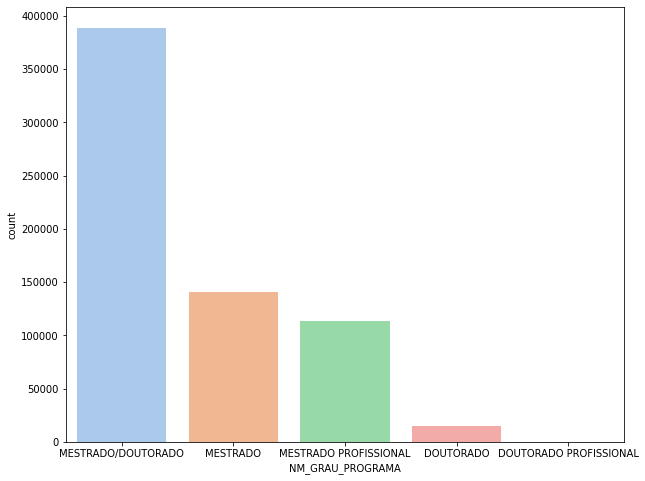

In [118]:
# a maioria dos dados de grau do programa é 'mestrado/doutorado' vou deixar para trata-los mais tarde e focar nos dados inerentes aos professores

plt.figure(figsize=(10, 8))
sns.countplot(x='NM_GRAU_PROGRAMA', color="azul", palette='pastel', data = df1)

In [119]:
df1['DS_TIPO_VINCULO_DOCENTE_IES'].unique()

array(['COLABORADOR', 'SERVIDOR PÚBLICO', 'APOSENTADO', 'CLT',
       'BOLSA DE FIXAÇÃO', nan], dtype=object)

In [120]:
df1['Profs_Colaboradores'] = np.where(df1['DS_TIPO_VINCULO_DOCENTE_IES'] == 'COLABORADOR', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
df1['Profs_ServidoresPublicos'] = np.where(df1['DS_TIPO_VINCULO_DOCENTE_IES'] == 'SERVIDOR PÚBLICO', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
df1['Profs_Aposentados'] = np.where(df1['DS_TIPO_VINCULO_DOCENTE_IES'] == 'APOSENTADO', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
df1['Profs_VinculoCLT'] = np.where(df1['DS_TIPO_VINCULO_DOCENTE_IES'] == 'CLT', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
df1['Profs_BolsaDeFixacao'] = np.where(df1['DS_TIPO_VINCULO_DOCENTE_IES'] == 'BOLSA DE FIXAÇÃO', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
df1['QTDE_Prof_Doutor'] = np.where(df1['IN_DOUTOR'] == 'S', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
df1['QTDE_Prof_NaoDoutor'] = np.where(df1['IN_DOUTOR'] == 'N', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
df1['QTDE_titulados_Brasil'] = np.where(df1['NM_PAIS_IES_TITULACAO'] == 'BRASIL', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
df1['QTDE_titulados_Exterior'] = np.where(df1['NM_PAIS_IES_TITULACAO'] != 'BRASIL', 1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
# verificar mais tarde

df1['NM_GRAU_TITULACAO'].unique()

array(['DOUTORADO', nan, 'MESTRADO', 'BACHARELADO',
       'MESTRADO PROFISSIONAL', 'GRADUAÇÃO'], dtype=object)

In [130]:
#verificar mais tarde

df1['DS_CLIENTELA_QUADRIENAL_2017'].unique()

array(['AVALIAÇÃO', 'NÃO', 'AVALIAÇÃO PROFs', 'ACOMPANHAMENTO', nan],
      dtype=object)

In [131]:
df1.head()

,AN_BASE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,NM_GRAU_PROGRAMA,NM_MODALIDADE_PROGRAMA,CD_CONCEITO_PROGRAMA,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,SG_UF_PROGRAMA,NM_REGIAO,ID_PESSOA,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_FAIXA_ETARIA,NM_PAIS_NACIONALIDADE_DOCENTE,DS_TIPO_VINCULO_DOCENTE_IES,DS_REGIME_TRABALHO,CD_CAT_BOLSA_PRODUTIVIDADE,IN_DOUTOR,AN_TITULACAO,NM_GRAU_TITULACAO,SG_IES_TITULACAO,NM_IES_TITULACAO,NM_PAIS_IES_TITULACAO,DS_CLIENTELA_QUADRIENAL_2017,Mulheres,Homens,QTD_DOCENTES,Brasileiros,Estrangeiros,QTDE_Regime_Parcial,QTDE_Regime_Integral,QTDE_Regime_Exclusivo,Profs_Colaboradores,Profs_ServidoresPublicos,Profs_Aposentados,Profs_VinculoCLT,Profs_BolsaDeFixacao,QTDE_Prof_Doutor,QTDE_Prof_NaoDoutor,QTDE_titulados_Brasil,QTDE_titulados_Exterior
0,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,832956,FEMININO,1975,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,PARIS 7,UNIVERSITÉ PARIS DIDEROT - PARIS VII,FRANÇA,AVALIAÇÃO,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1
1,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,34738,MASCULINO,1978,35 A 39 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,AVALIAÇÃO,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,729344,MASCULINO,1954,55 A 59 ANOS,BRASIL,COLABORADOR,PARCIAL,NaN,S,2008.0,DOUTORADO,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,BRASIL,AVALIAÇÃO,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
3,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,526496,FEMININO,1966,45 A 49 ANOS,BRASIL,SERVIDOR PÚBLICO,INTEGRAL,NaN,S,1999.0,DOUTORADO,USP/RP,UNIVERSIDADE DE SÃO PAULO/ RIBEIRÃO PRETO,BRASIL,AVALIAÇÃO,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,2013,9,CIÊNCIAS BIOLÓGICAS III,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,10001018002P1,BIOLOGIA EXPERIMENTAL,MESTRADO/DOUTORADO,ACADÊMICO,3,UNIR,UNIVERSIDADE FEDERAL DE RONDÔNIA,FEDERAL,RO,NORTE,10229,MASCULINO,1928,70 OU MAIS,BRASIL,APOSENTADO,PARCIAL,NaN,S,1960.0,DOUTORADO,USP,UNIVERSIDADE DE SÃO PAULO,BRASIL,AVALIAÇÃO,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0


- Algumas visualizações relacionadas a conceito

In [144]:
df1.groupby('CD_PROGRAMA_IES').CD_CONCEITO_PROGRAMA.agg(['min','max','mean'])

,min,max,mean
CD_PROGRAMA_IES,,,
10001018002P1,3,4,3.398649
10001018004P4,4,4,4.000000
10001018005P0,4,4,4.000000
10001018006P7,3,4,3.542169
10001018008P0,2,2,2.000000
...,...,...,...
53029011002P7,3,3,3.000000
53032012001P8,3,3,3.000000
53037014001P0,3,4,3.460000


In [143]:
df1.groupby('CD_PROGRAMA_IES').CD_CONCEITO_PROGRAMA.agg(['min','max','mean']).sort_values(by='mean', ascending=False)

,min,max,mean
CD_PROGRAMA_IES,,,
33003017003P5,7,7,7.0
33002061001P3,7,7,7.0
42001013047P5,7,7,7.0
33002045020P7,7,7,7.0
53001010003P2,7,7,7.0
...,...,...,...
12001015020P5,2,2,2.0
12001015028P6,2,2,2.0
33078017005P2,1,1,1.0


In [146]:
df1['CD_AREA_AVALIACAO'].unique()

array([ 9, 45, 36, 27, 41, 37, 38, 49,  7, 42, 22,  4, 25,  3,  5, 13,  2,
       48,  1, 14, 10, 40, 34, 23, 32, 35, 31, 19, 47, 18,  6, 16, 26, 46,
       30, 12,  8, 28, 39, 11, 24, 29, 20, 33, 15, 44, 17, 50, 21])

- Dados agrupados por Área de avaliação calculando o valor minimo, máximo ordenados por média.

In [158]:
# como mostrar a coluna de Nome da área também?
df1.groupby('NM_AREA_AVALIACAO').CD_CONCEITO_PROGRAMA.agg(['min','max','mean']).sort_values(by='mean', ascending=False)

# matematica é vida, change my mind

,min,max,mean
NM_AREA_AVALIACAO,,,
CIÊNCIAS BIOLÓGICAS III,2,7,5.253547
CIÊNCIAS BIOLÓGICAS II,2,7,5.055178
ASTRONOMIA / FÍSICA,2,7,5.013819
QUÍMICA,2,7,4.964991
MATEMÁTICA / PROBABILIDADE E ESTATÍSTICA,3,7,4.879934
CIÊNCIAS BIOLÓGICAS I,2,7,4.737299
GEOCIÊNCIAS,3,7,4.689243
MEDICINA II,2,7,4.591141
LINGUÍSTICA E LITERATURA,2,7,4.537373


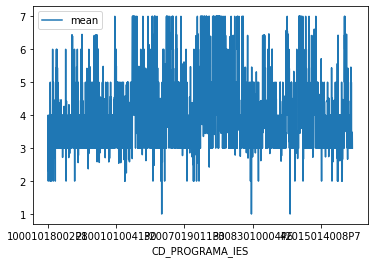

In [139]:
#visualização ruim mas vou deixar pra usar de exemplo
df1.groupby('CD_PROGRAMA_IES').CD_CONCEITO_PROGRAMA.agg(['mean']).plot(kind='line')

In [133]:
# lembrar de definir como tratar os dados de faixa etaria, ano de titulação, grau do programa (podemos tratar mais tarde na base de programa), grau de titulação
# talvez media de idade mulheres e homens

- Agrupando os dados por PPG e Ano, agregando por soma

In [ ]:
#certeza que tem um jeito mais prático de fazer isso

df2 = df1.groupby(['CD_PROGRAMA_IES','AN_BASE'],as_index=False).agg({'CD_AREA_AVALIACAO': np.max,'CD_CONCEITO_PROGRAMA': np.max, 'QTD_DOCENTES': np.sum,'Mulheres': np.sum, 'Homens': np.sum, 'Brasileiros': np.sum, 'Estrangeiros': np.sum, 'QTDE_Regime_Parcial': np.sum, 'QTDE_Regime_Integral': np.sum, 'QTDE_Regime_Exclusivo': np.sum, 'QTDE_Prof_Doutor': np.sum, 'QTDE_Prof_NaoDoutor': np.sum ,'QTDE_titulados_Brasil': np.sum, 'QTDE_titulados_Exterior':np.sum, 'Profs_Colaboradores':np.sum, 'Profs_ServidoresPublicos': np.sum, 'Profs_VinculoCLT': np.sum, 'Profs_Aposentados':np.sum, 'Profs_BolsaDeFixacao': np.sum })

In [156]:
df2.head(7)

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CD_CONCEITO_PROGRAMA,QTD_DOCENTES,Mulheres,Homens,Brasileiros,Estrangeiros,QTDE_Regime_Parcial,QTDE_Regime_Integral,QTDE_Regime_Exclusivo,QTDE_Prof_Doutor,QTDE_Prof_NaoDoutor,QTDE_titulados_Brasil,QTDE_titulados_Exterior,Profs_Colaboradores,Profs_ServidoresPublicos,Profs_VinculoCLT,Profs_Aposentados,Profs_BolsaDeFixacao
0,10001018002P1,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0
1,10001018002P1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0
2,10001018002P1,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0
3,10001018002P1,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0
4,10001018002P1,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0
5,10001018002P1,2018,9,4,18,6,12,18,0,14,3,1,18,0,16,2,11,7,0,0,0
6,10001018002P1,2019,9,4,19,8,11,19,0,15,3,1,19,0,17,2,12,7,0,0,0


- O próximo passo seria verificar quais os dados vamos usar como média, ou algo assim & verificar se há dados de features redundantes - se vamos deixar ou excluímos